# Description

Toy notebook modeling the evolution of a random boolean network with a perturbation (based on https://www.youtube.com/watch?v=mCML2B94rUg&ab_channel=Computerphile)

## Imports

In [1]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

## Setting seed for reproducibility

In [5]:
np.random.seed(2)

## Parameters (change for fun!)

In [18]:
n_cons = 3
nodes = 50
iterations = 600

## Main code

In [23]:
keys = [*product(*[[0,1]]*n_cons)]
values = np.random.randint(2,size=len(keys)) 

mutation_table = dict(zip(keys,values))

node_values = np.random.randint(2,size=nodes)
connections = np.random.randint(nodes,size=(nodes,n_cons))

result = np.zeros(shape=(nodes,iterations+1))
result[:,0] = node_values

for t in range(1,iterations+1):

    con_result = [tuple(x) for x in node_values[connections]]

    node_values = np.array([mutation_table[x] for x in con_result])
    result[:,t] = node_values
    
    #Perturbation
    if t == iterations//2:
        for k in range(10):
            node_values[k] = 1 if node_values[k]==0 else 0
            result[k,t] = 1 if result[k,t]==0 else 0


## Plotting the result

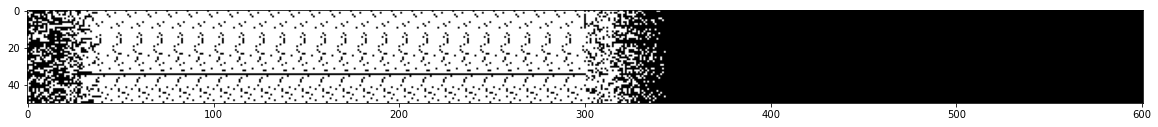

In [24]:
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.imshow(result,cmap='gray')